In [2]:
import numpy as np
import pandas as pd 

In [3]:
import tensorflow as tf
from tensorflow import keras

import re
from nltk.corpus import stopwords

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

**1.Load Dataset**

In [4]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\archive (5)\eng_-french.csv",names=['english','french'])
print(df.head(5))

print(f"\n\n Shape of the data >>{df.shape}")
df.sample(5)

                   english                  french
0  English words/sentences  French words/sentences
1                      Hi.                  Salut!
2                     Run!                 Cours !
3                     Run!                Courez !
4                     Who?                   Qui ?


 Shape of the data >>(175622, 2)


,english,french
133908,I'd rather do this without your help.,Je préférerais le faire sans votre aide.
32196,We don't understand.,Nous ne comprenons pas.
155937,I suggest you do your job and let me do mine.,Je suggère que tu fasses ton boulot et me lais...
122273,This week is Fire Prevention Week.,Cette semaine est la semaine de prévention des...
89978,I know it's important to you.,Je sais que c'est important pour vous.


**2.Check Dataset**
* duplicates
* NA values

In [5]:
print("Unique values before dropping duplicates")
print(df.english.nunique())
print(df.french.nunique())

df.drop_duplicates(subset=['english'],inplace=True)
df.drop_duplicates(subset=['french'],inplace=True)

print("\n\nUnique values before dropping duplicates")
print(df.english.nunique())
print(df.french.nunique())

Unique values before dropping duplicates
123101
165976


Unique values before dropping duplicates
116544
116544


In [6]:
print("Checking NA values\n")
print(df.isnull().any(),'\n')
print(df.isnull().sum())

Checking NA values

english    False
french     False
dtype: bool 

english    0
french     0
dtype: int64


**3.Preprocessing Text**
* lowercase for both
* drop stopwords for only english -> let's not remove stopwords
* drop .'!#$%&\'()*+,-./:;<=>?@[\\]^ `{|}~
* switch contractions for eng


In [7]:
print("before preprocessing")
df.tail(6)

before preprocessing


,english,french
175616,We need to uphold laws against discrimination ...,Nous devons faire respecter les lois contre la...
175617,"Top-down economics never works, said Obama. ""T...","« L'économie en partant du haut vers le bas, ç..."
175618,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
175619,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
175620,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...
175621,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...


In [8]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
eng_stopwords = set(stopwords.words("english"))
def preprocess(sentence,language):
    sentence = sentence.lower()
    if language == "english":
        sentence = ' '.join([contractions[word] if word in contractions else word for word in sentence.split()])
    sentence = re.sub(r"[.'!#$%&\'()*+,-./:;<=>?@[\\]^ `{|}~]"," ",sentence)
    sentence = ' '.join([word for word in sentence.split()])

    return sentence


In [11]:
df.english = df.english.apply(lambda x:preprocess(x,'english'))
df.french = df.french.apply(lambda x:preprocess(x,'french'))

print(df.shape,'\n')
df.info()

(116544, 2) 

<class 'pandas.core.frame.DataFrame'>
Index: 116544 entries, 0 to 175621
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  116544 non-null  object
 1   french   116544 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [12]:
print("after preprocessing")
df.tail(6)

after preprocessing


,english,french
175616,we need to uphold laws against discrimination ...,nous devons faire respecter les lois contre la...
175617,"top-down economics never works, said obama. ""t...","« l'économie en partant du haut vers le bas, ç..."
175618,a carbon footprint is the amount of carbon dio...,une empreinte carbone est la somme de pollutio...
175619,death is something that we are often discourag...,la mort est une chose qu'on nous décourage sou...
175620,since there are usually multiple websites on a...,puisqu'il y a de multiples sites web sur chaqu...
175621,if someone who does not know your background s...,si quelqu'un qui ne connaît pas vos antécédent...


**4.Train / Test separate**

In [13]:
df["french_input"] = df.french.apply(lambda x:'sostoken ' + x)
df["french_label"] = df.french.apply(lambda x:x + ' eostoken')

encoder_input = np.array(df.english)
decoder_input = np.array(df.french_input)
decoder_label = np.array(df.french_label)


indices = np.arange(116544)
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_label = decoder_label[indices]

df.head()

,english,french,french_input,french_label
0,english words/sentences,french words/sentences,sostoken french words/sentences,french words/sentences eostoken
1,hi.,salut!,sostoken salut!,salut! eostoken
2,run!,cours !,sostoken cours !,cours ! eostoken
4,who?,qui ?,sostoken qui ?,qui ? eostoken
5,wow!,ça alors !,sostoken ça alors !,ça alors ! eostoken


In [14]:
total = df.shape[0]
test_size = 0.3

train_encoder_input = encoder_input[:-int(total*test_size)]
train_decoder_input = decoder_input[:-int(total*test_size)]
train_decoder_label = decoder_label[:-int(total*test_size)]

test_encoder_input = encoder_input[-int(total*test_size):]
test_decoder_input = decoder_input[-int(total*test_size):]
test_decoder_label = decoder_label[-int(total*test_size):]

print("train dataset shape")
print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

print("\n\ntest dataset shape")
print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)

train dataset shape
(81581,)
(81581,)
(81581,)


test dataset shape
(34963,)
(34963,)
(34963,)


**5.Tokenize & Pad sequences**

In [15]:
eng_tok = Tokenizer()
eng_tok.fit_on_texts(train_encoder_input)
print(f"Number of unique words used in english sentences >> {len(eng_tok.index_word)}")

fr_tok = Tokenizer()
fr_tok.fit_on_texts(train_decoder_input)
fr_tok.fit_on_texts(train_decoder_label)
print(f"Number of unique words used in french sentences >> {len(fr_tok.index_word)}")

Number of unique words used in english sentences >> 12620
Number of unique words used in french sentences >> 21199


In [16]:
total_counts = 0
rare_counts = 0
total_freq = 0
rare_freq = 0

least_occurence = 3
for k,v in eng_tok.word_counts.items():
    total_counts +=1
    total_freq += v
    if v < least_occurence:
        rare_counts+=1
        rare_freq += v

print("="*25,"english","="*25)
print(f"{rare_counts} of {total_counts} words are used less than {least_occurence}times,")
print(f"which is only {np.round(rare_counts/total_counts*100)}% of total words used")
print(f"But they occupy {np.round(rare_freq/total_freq*100)}% of total frequency ")

========================= english =========================
6627 of 12620 words are used less than 3times,
which is only 53.0% of total words used
But they occupy 2.0% of total frequency 


In [17]:
total_counts = 0
rare_counts = 0
total_freq = 0
rare_freq = 0

least_occurence = 3
for k,v in fr_tok.word_counts.items():
    total_counts +=1
    total_freq += v
    if v < least_occurence:
        rare_counts+=1
        rare_freq += v

print("="*25,"french","="*25)
print(f"{rare_counts} of {total_counts} words are used less than {least_occurence}times,")
print(f"which is only {np.round(rare_counts/total_counts*100)}% of total words used")
print(f"But they occupy {np.round(rare_freq/total_freq*100)}% of total frequency ")

========================= french =========================
9300 of 21199 words are used less than 3times,
which is only 44.0% of total words used
But they occupy 1.0% of total frequency 


In [18]:
eng_word_size = 6000
eng_vocab_size = eng_word_size+1
fr_word_size = 12000
fr_vocab_size = fr_word_size+1

eng_tok = Tokenizer(num_words=eng_word_size)
eng_tok.fit_on_texts(train_encoder_input)

train_encoder_input = eng_tok.texts_to_sequences(train_encoder_input)
test_encoder_input = eng_tok.texts_to_sequences(test_encoder_input)

fr_tok = Tokenizer(num_words=fr_word_size)
fr_tok.fit_on_texts(train_decoder_input)
fr_tok.fit_on_texts(train_decoder_label)

train_decoder_input = fr_tok.texts_to_sequences(train_decoder_input)
train_decoder_label = fr_tok.texts_to_sequences(train_decoder_label)

test_decoder_input = fr_tok.texts_to_sequences(test_decoder_input)
test_decoder_label = fr_tok.texts_to_sequences(test_decoder_label)

english
mean >>  6.57043919540089
french
mean >>  7.784618967651782


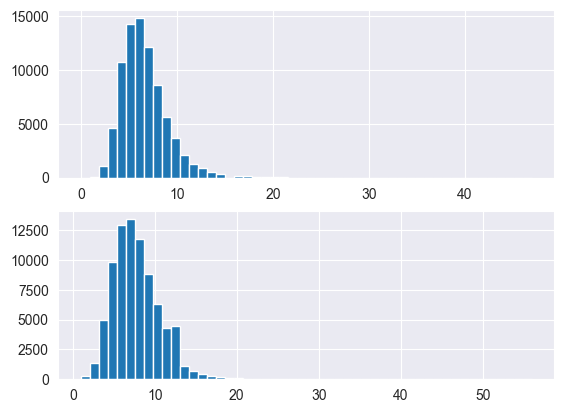

In [19]:
print("english")
eng_lens = [len(seq) for seq in train_encoder_input]
print("mean >> ",np.mean(eng_lens))
plt.subplot(2,1,1)
plt.hist(eng_lens,bins=50)


print("french")
fr_lens = [len(seq) for seq in train_decoder_input]
print("mean >> ",np.mean(fr_lens))
plt.subplot(2,1,2)
plt.hist(fr_lens,bins=50)
plt.show()

In [20]:
eng_sequence_size = 10
fr_sequence_size = 20

train_encoder_input = pad_sequences(train_encoder_input,padding='post',truncating='post',maxlen=eng_sequence_size)
test_encoder_input = pad_sequences(test_encoder_input,padding='post',truncating='post',maxlen=eng_sequence_size)

train_decoder_input = pad_sequences(train_decoder_input,padding='post',truncating='post',maxlen=fr_sequence_size)
train_decoder_label = pad_sequences(train_decoder_label,padding='post',truncating='post',maxlen=fr_sequence_size)

test_decoder_input = pad_sequences(test_decoder_input,padding='post',truncating='post',maxlen=fr_sequence_size)
test_decoder_label = pad_sequences(test_decoder_label,padding='post',truncating='post',maxlen=fr_sequence_size)

print("train dataset shape")
print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

print("\n\ntest dataset shape")
print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)

train dataset shape
(81581, 10)
(81581, 20)
(81581, 20)


test dataset shape
(34963, 10)
(34963, 20)
(34963, 20)


**6.Encoder-Decoder Model : Stacked LSTM + Luong Attention**

In [21]:
from keras.layers import Input,Embedding,LSTM,Dense,Concatenate,Attention
from keras.models import Model
from keras.utils import plot_model
from keras import backend as K

#hyperparameters
embedding_size = 256
hidden_size = 256

encoder_input = Input(shape=[eng_sequence_size])
encoder_embedding = Embedding(eng_vocab_size,embedding_size,mask_zero=True)
encoder_embedded = encoder_embedding(encoder_input)

encoder_lstm1 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output1,encoder_h1,encoder_c1 = encoder_lstm1(encoder_embedded)

encoder_lstm2 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output2,encoder_h2,encoder_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output3,encoder_h3,encoder_c3 = encoder_lstm3(encoder_output1)

decoder_input = Input(shape=(None,))
decoder_embedding = Embedding(fr_vocab_size,embedding_size,mask_zero=True)
decoder_embedded = decoder_embedding(decoder_input)

decoder_lstm = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
decoder_output,_,_ = decoder_lstm(decoder_embedded,initial_state=[encoder_h3,encoder_c3])

attn_layer = Attention()
attn_context = attn_layer([decoder_output,encoder_output3])

decoder_output = Concatenate(axis=-1)([decoder_output,attn_context])
tanh_dense= Dense(hidden_size*2,activation=K.tanh)
decoder_output = tanh_dense(decoder_output)

softmax_dense = Dense(fr_vocab_size,activation='softmax')
decoder_output = softmax_dense(decoder_output)

trainer_model = Model([encoder_input,decoder_input],decoder_output)
trainer_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
plot_model(trainer_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
trainer_hist =trainer_model.fit([train_encoder_input,train_decoder_input],train_decoder_label,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10


 23/510 [>.............................] - ETA: 12:41 - loss: 7.7752 - accuracy: 0.1241

In [38]:
trainer_model.save("translation_project.h5")

C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
import joblib

In [40]:
joblib.dump(eng_tok,'eng_tok.pkl')

['eng_tok.pkl']

In [41]:
joblib.dump(fr_tok,'fr_tok.pkl')

['fr_tok.pkl']

In [28]:
#generator model
gen_encoder = Model([encoder_input],[encoder_output3,encoder_h3,encoder_c3])

gen_decoder_values_input = Input(shape=(eng_sequence_size,hidden_size))
gen_decoder_h_input = Input(shape=[hidden_size])
gen_decoder_c_input = Input(shape=[hidden_size])

gen_decoder_embedded = decoder_embedding(decoder_input)
gen_decoder_output,gen_decoder_h,gen_decoder_c = decoder_lstm(gen_decoder_embedded,initial_state=[gen_decoder_h_input,gen_decoder_c_input])

attn_context = attn_layer([gen_decoder_output,gen_decoder_values_input])
gen_decoder_output = Concatenate(axis=-1)([gen_decoder_output,attn_context])

gen_decoder_output = tanh_dense(gen_decoder_output)
gen_decoder_output = softmax_dense(gen_decoder_output)

gen_decoder = Model([decoder_input]+[gen_decoder_values_input,gen_decoder_h_input,gen_decoder_c_input],[gen_decoder_output,gen_decoder_h,gen_decoder_c])

In [1]:
 plot_model(gen_encoder)

In [2]:
plot_model(gen_decoder)

In [43]:
gen_decoder.save("gen_decoder.h5")

In [44]:
gen_encoder.save("gen_encoder.h5")

In [31]:
def seq2eng(seq):
    ret =[]
    for n in seq:
        if n != 0:
            ret.append(eng_tok.index_word[n])
    ret = ' '.join(ret)
    return ret

def seq2fr(seq):
    ret =[]
    for n in seq:
        if n != 0 and fr_tok.index_word[n] != 'eostoken':
            ret.append(fr_tok.index_word[n])
    ret = ' '.join(ret)
    return ret

In [32]:
def generate_from_encoder_input(encoder_input):
    encoder_input = encoder_input.reshape(1,-1)
    values,h,c = gen_encoder.predict(encoder_input)

    single_tok = np.zeros((1,1))
    single_tok[0,0] = fr_tok.word_index['sostoken']
    decoder_input = single_tok

    generated = []
    count = 0
    while(True):
        decoder_output,new_h,new_c = gen_decoder.predict([decoder_input]+[values,h,c])
        count +=1

        sampled_index = np.argmax(decoder_output[0,-1,:])
        sampled_word = fr_tok.index_word[sampled_index]

        if sampled_word != 'eostoken' and sampled_index != 0:
            generated.append(sampled_word)
        if count >= fr_sequence_size or sampled_word == 'eostoken':
            break

        h,c = new_h,new_c
        decoder_input[0,0] = sampled_index

    generated = ' '.join(generated)
    return generated

In [33]:
for i in range(520,525):
    print("\n<<sample encoder input english sentence>>")
    print(seq2eng(train_encoder_input[i]))
    print("\n")
    print("<<sample generated french sentence>>")
    print(generate_from_encoder_input(train_encoder_input[i]))
    print("\n")
    print("<<answer french sentence>>")
    print(seq2fr(train_decoder_label[i]))
    print("========================================\n")


<<sample encoder input english sentence>>
excuse me but could you over a little bit please


<<sample generated french sentence>>
1/1 [==============================] - 0s 31ms/step
excusez moi mais pourriez vous vous retrouver un peu de retard


<<answer french sentence>>
peux tu te mettre un peu de côté s'il te plait


<<sample encoder input english sentence>>
can i see the message


<<sample generated french sentence>>
1/1 [==============================] - 0s 32ms/step
puis je voir le message


<<answer french sentence>>
est ce que je peux voir le message


<<sample encoder input english sentence>>
every boy and girl is taught to read and write


<<sample generated french sentence>>
1/1 [==============================] - 0s 28ms/step
chaque garçon et la fille est mariée et dormir


<<answer french sentence>>
on enseigne à lire et à écrire à chaque garçon ou fille


<<sample encoder input english sentence>>
i will answer that question


<<sample generated french sentence>>
1/1 [===

In [34]:
idx = [24,1525,666,2222,52212]

print("Results on Train Dataset")
for i in idx:
    print("\nINPUT ENG>>")
    print(seq2eng(train_encoder_input[i]))
    print("\n")
    print("GENERATED FR>>")
    print(generate_from_encoder_input(train_encoder_input[i]))
    print("\n")
    print("ANSWER FR>>")
    print(seq2fr(train_decoder_label[i]))
    print("=====================================================================\n")

Results on Train Dataset

INPUT ENG>>
many cities were destroyed by bombs


GENERATED FR>>
1/1 [==============================] - 0s 31ms/step
de nombreux villes furent détruites par les bombes


ANSWER FR>>
de nombreuses villes furent détruites par les bombes


INPUT ENG>>
bear in mind that under such circumstances we have no


GENERATED FR>>
1/1 [==============================] - 0s 30ms/step
fais attention à ce que les circonstances nous n'avons pas pu


ANSWER FR>>
comprenez bien que dans de telles circonstances nous n'avons pas d'autres alternatives que de trouver un autre


INPUT ENG>>
i heard the message


GENERATED FR>>
1/1 [==============================] - 0s 32ms/step
j'ai entendu le message


ANSWER FR>>
j'ai entendu le message


INPUT ENG>>
you are not high enough


GENERATED FR>>
1/1 [==============================] - 0s 32ms/step
tu n'es pas assez grand


ANSWER FR>>
tu ne pas assez haut


INPUT ENG>>
i have no food


GENERATED FR>>
1/1 [==============================] -

In [35]:
idx = [24,1525,666,2222]

print("Results on Test Dataset")
for i in idx:
    print("\nINPUT ENG>")
    print(seq2eng(test_encoder_input[i]))
    print(test_encoder_input[i])
    print("\n")
    print("<<GENERATED FR>>")
    print(generate_from_encoder_input(test_encoder_input[i]))
    print("\n")
    print("<<ANSWER FR>>")
    print(seq2fr(test_decoder_label[i]))
    print(test_decoder_label[i])
    print("=====================================================================\n")

Results on Test Dataset

INPUT ENG>
take all the time you want
[90 39  2 47  4 31  0  0  0  0]


<<GENERATED FR>>
1/1 [==============================] - 0s 32ms/step
prends tout le temps que tu veux


<<ANSWER FR>>
prends tout le temps que tu veux
[464  34   7  55   6  14  42   2   0   0   0   0   0   0   0   0   0   0
   0   0]


INPUT ENG>
i do not think tom is
[ 1  8  7 42  9  5  0  0  0  0]


<<GENERATED FR>>
1/1 [==============================] - 0s 30ms/step
je ne pense pas que tom soit


<<ANSWER FR>>
je ne pense pas que tom soit daltonien
[    3    10    65     5     6    12   133 11991     2     0     0     0
     0     0     0     0     0     0     0     0]


INPUT ENG>
do not forget to tip the porter for carrying your
[   8    7  401    3 2670    2 5144   22 2889   29]


<<GENERATED FR>>
1/1 [==============================] - 0s 29ms/step
n'oublie pas d'éteindre la poule pour les quatre


<<ANSWER FR>>
n'oublie pas de donner un pourboire au porteur pour avoir porté tes bagag

In [45]:
def translate_user_input(user_input):
    # Preprocess user input
    preprocessed_input = preprocess(user_input, 'english')
    print(preprocessed_input)

    # Tokenize and pad user input
    input_sequence = eng_tok.texts_to_sequences([preprocessed_input])
    padded_input_sequence = pad_sequences(input_sequence, padding='post', truncating='post', maxlen=eng_sequence_size)

    # Generate translation
    generated_translation = generate_from_encoder_input(padded_input_sequence)

    return generated_translation


In [46]:
user_input_sentence = input("enter : ")
translated_sentence = translate_user_input(user_input_sentence)

print(f"English: {user_input_sentence}")
print(f"French Translation: {translated_sentence}")


enter : good morning
good morning
1/1 [==============================] - 0s 38ms/step
English: good morning
French Translation: bonne matinée


In [51]:
import requests

In [52]:
url=""

In [53]:
import json
data=json.dumps(user_input_sentence)

In [54]:
r=requests.post(url,data)

In [55]:
r.content

b'<!doctype html>\n<html lang=en>\n<title>500 Internal Server Error</title>\n<h1>Internal Server Error</h1>\n<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>\n'